
SMART  TITANIC  SURVIVAL  SYSTEM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 as sq
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# PANDAS
print("TITANIC SURVIVAL DATASET")
df=pd.read_csv("/content/train.csv")
df.head()

TITANIC SURVIVAL DATASET


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Total number of passengers in titanic:")
print(df.shape[0])
print()
print("INfo OF DATASET")
print()
df.info()
print()
df.describe()

Total number of passengers in titanic:
891

INfo OF DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Find any missing values")
df.isnull()

Find any missing values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
ages=df["Age"].dropna().values
print("Average Age of passengers in titanic",np.mean(ages))
print("Maximum Age of passengers in titanic",np.max(ages))

Average Age of passengers in titanic 29.69911764705882
Maximum Age of passengers in titanic 80.0


In [8]:
# filling missing values
df["Age"]=df["Age"].fillna(df["Age"].mean())
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [9]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Select only main columns to train the model
df=df[["Survived","Pclass","Sex","Age","Fare","Embarked"]]
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [11]:
# changing categorical Sex and Embarked to Numeric
df["Sex"]=df["Sex"].map({"male":0,"female":1})
df["Embarked"]=df["Embarked"].map({"C":0,"Q":1,"S":3})
print("Data after Cleaning")
df.head()

Data after Cleaning


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,3
1,1,1,1,38.0,71.2833,0
2,1,3,1,26.0,7.9250,3
3,1,1,1,35.0,53.1000,3
4,0,3,0,35.0,8.0500,3


In [12]:
print("Survival Rate of Passengers")
df["Survived"].value_counts()

Survival Rate of Passengers


,count
Survived,
0,549
1,342


In [13]:
print("Average age by Survival")
print(df.groupby("Survived")["Age"].mean())

Average age by Survival
Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64


In [ ]:
print("Survival Rate by gender")
print(df.groupby("Survived")["Sex"].mean())

Survival Rate by gender
Survived
0    0.147541
1    0.681287
Name: Sex, dtype: float64


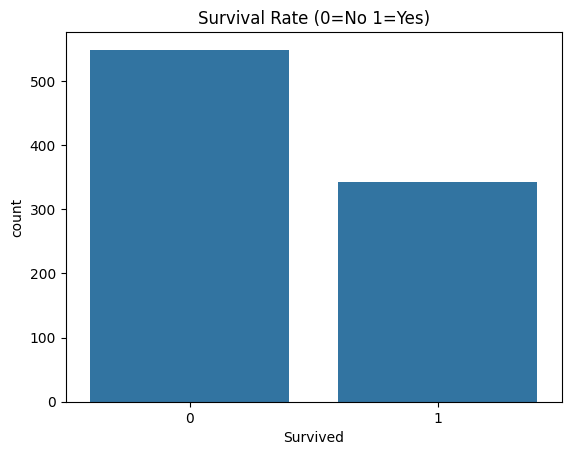

In [14]:
# Visualization using Seaborn
sns.countplot(data=df,x="Survived")
plt.title("Survival Rate (0=No 1=Yes)")
plt.show()

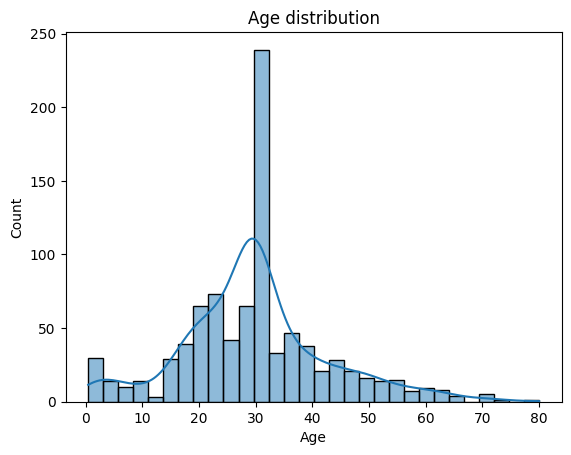

In [15]:
sns.histplot(df["Age"],kde=True)
plt.title("Age distribution")
plt.show()

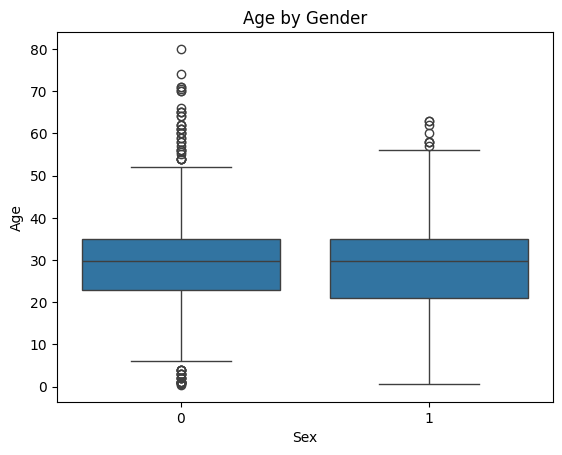

In [16]:
sns.boxplot(data=df,x="Sex",y="Age")
plt.title("Age by Gender")
plt.show()

In [17]:
print("Saving to SQL table")
conn=sq.connect("titanic.db")
df.to_sql("Passengers",conn,if_exists="replace",index=False)
cursor=conn.cursor()
cursor.execute("""
SELECT Survived ,COUNT(*)
FROM PASSENGERS
GROUP BY Survived
""")
print(cursor.fetchall())

Saving to SQL table
[(0, 549), (1, 342)]


In [18]:
cursor.execute("""
SELECT Pclass, COUNT(*)
FROM passengers
GROUP BY Pclass
""")
print("Passengers per class:", cursor.fetchall())


Passengers per class: [(1, 216), (2, 184), (3, 491)]


In [19]:
# Training Model
print("Training Logistic Regression Model")
x=df[["Pclass","Sex","Age","Fare","Embarked"]]
y=df["Survived"]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy",accuracy)

Training Logistic Regression Model
Model Accuracy 0.7985074626865671
